In [2]:
%pwd

'C:\\Caba2015\\workspace\\caba\\dataprocessing'

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
titanic = pd.read_csv('dataset/titanic3.csv')
titanic.head(2)

# 불필요한 columns는 drop하되, 데이터를 상세히 살펴보면서 진행

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


#### * null 처리


* Age: null값 263개를 갖고 있음
* Cabin: null값 1014개를 갖고 있음
* Embarked: null값 2개를 갖고 있음
* fare

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


### Q. 타이타닉 생존자 예측모델 개발을 위한 Titanic 분석용 데이터셋

Titanic data 전처리
- 분석 데이터: titanic3.csv
- 재사용 가능한 전처리 사용자 함수 작성하여 일괄 전처리 Null값 처리: Age는 평균나이, 나머지 칼럼은 'N'값으로 변경. Cabin칼럼은 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요하며 앞 문자만 추출. 문자열 칼럼 레이블 인코딩 불필요한 속성 칼럼 삭제
- 탐색적 분석 필수 항목: groupby() 또는 sns.barplot()을 사용하여 성별 생존자, 객실 등급별 성별 생존자, 연령별(카테고리 분류) 생존자
- 통계적, 시각적 탐색을 통한 다양한 인사이트 도출
- 파생변수: 분석에 필요한 파생변수 2개 이상 생성
- 탐색 결과에 대한 종합 의견

컬럼 정보

- survived: 생존여부(1:생존, 0:사망)
- pclass: 승선권 클래스(1:1st, 2:2nd. 3:3rd)
- name: 승객 이름
- sex: 승객 성별
- age: 승객 나이
- sibsp: 동반한 형제,자매,배우자 수
- parch : 동반한 부모, 자식 수
- ticket : 티켓의 고유 넘버
- fare 티켓의 요금
- cabin : 객실 번호
- embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
- boat
- body
- home.dest

In [21]:
titanic['age'].fillna(titanic['age'].mean(), inplace = True)
titanic = titanic.fillna('N')
print(titanic.info())
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   object 
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       1309 non-null   object 
 13  home.dest  1309 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 143.3+ KB
None


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.338,B5,S,2,N,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S,11,N,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S,N,N,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.55,C22 C26,S,N,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S,N,N,"Montreal, PQ / Chesterville, ON"


In [22]:
# Cabin칼럼은 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요하며 
# 앞 문자만 추출. 

def first_string(value):
    return value[0]

titanic.cabin = titanic.cabin.apply(lambda x:first_string(x))
titanic.cabin.head()

0    B
1    C
2    C
3    C
4    C
Name: cabin, dtype: object

In [23]:
# 문자열 칼럼 레이블 인코딩 불필요한 속성 칼럼 삭제
# ticket, name 칼럼 삭제

titanic.drop(['ticket','name'],axis=1,inplace=True)
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,home.dest
0,1,1,female,29.00,0,0,211.338,B,S,2,N,"St Louis, MO"
1,1,1,male,0.92,1,2,151.55,C,S,11,N,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.00,1,2,151.55,C,S,N,N,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.00,1,2,151.55,C,S,N,135,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.00,1,2,151.55,C,S,N,N,"Montreal, PQ / Chesterville, ON"


<AxesSubplot:xlabel='sex', ylabel='count'>

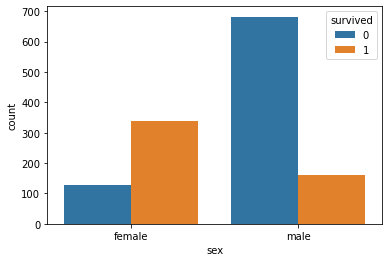

In [28]:
# titanic['families'] = titanic['sibsp']+titanic['parch']

# 탐색적 분석 필수 항목: groupby() 또는 sns.barplot()을 사용하여 
# 성별 생존자, 객실 등급별 성별 생존자, 연령별(카테고리 분류) 생존자
sns.countplot(x='sex',hue='survived',data=titanic)

In [37]:
# 객실 등급별 성별 생존자
sp_s = titanic.groupby(['sex','pclass'])['survived'].count().reset_index()
sp_s

,sex,pclass,survived
0,female,1,144
1,female,2,106
2,female,3,216
3,male,1,179
4,male,2,171
5,male,3,493


In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=['sex','pclass'],y='survived',data=sp_s,orient='v')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='age_group', ylabel='count'>

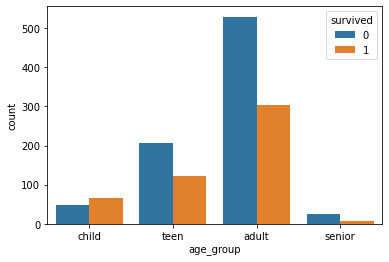

In [36]:
# 연령 별 생존자
titanic['age_group'] = pd.cut(titanic.age,bins=[0,15,25,60,100], labels=['child','teen','adult','senior'])

sns.countplot(x='age_group',hue='survived',data=titanic)
# child 탑승객의 경우 생존자 숫자가 더 많음. 다른 연령대에서는 그렇지 않음.